# MovieLens - Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('csv/dataframe.csv',index_col=0) 
df['date'] = pd.to_datetime(df['date'])

In [49]:
df_mov = pd.read_csv('csv/dataframe_movie.csv',index_col = 0)

### Distribution Ratings 

In [6]:
rat = df.groupby('rating')['userId'].count()

In [7]:
rat /= rat.sum()

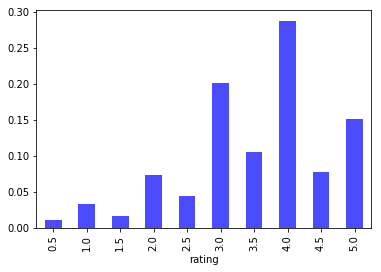

In [8]:
rat.plot(kind = 'bar',color = 'b',alpha= 0.7)
plt.show()

### Distribution Movies

In [9]:
avg_score = df.groupby('title')['rating'].mean()
count = df.groupby('title')['rating'].count()

In [10]:
count.sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [11]:
avg_score.sort_values(ascending=False).head()

title
Burn Up! (1991)                                     5.0
Absolute Giganten (1999)                            5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)    5.0
Erik the Viking (1989)                              5.0
Reality (2014)                                      5.0
Name: rating, dtype: float64

In [13]:
df_score = pd.DataFrame({'rating':avg_score, 'count':count})
df_score.reset_index(inplace=True)

In [14]:
# Round average rating
def rounded(x):
    if x - np.floor(x) <= 0.25:
        return np.floor(x)  
    elif x - np.floor(x) <= 0.5:
        return np.floor(x) + 0.5
    elif x - np.floor(x) <= 0.75:
        return np.ceil(x) - 0.5
    else:
        return np.ceil(x)

In [15]:
df_score['rating'] = df_score['rating'].apply(lambda x: rounded(x))

In [16]:
df_score.head()

,title,count,rating
0,"""Great Performances"" Cats (1998)",2,1.5
1,$9.99 (2008),3,4.0
2,'Hellboy': The Seeds of Creation (2004),1,2.0
3,'Neath the Arizona Skies (1934),1,0.5
4,'Round Midnight (1986),2,2.0


In [18]:
dist_avg_rat = df_score.groupby('rating')['count'].count()

In [19]:
# Normalize
dist_avg_rat /= dist_avg_rat.sum()

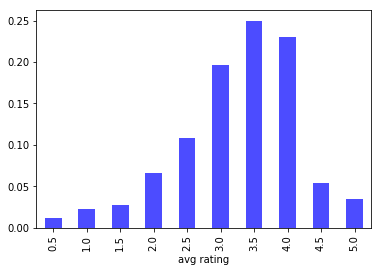

In [20]:
dist_avg_rat.plot.bar(color = 'b',label = None,alpha = 0.7)

plt.xlabel('avg rating')
plt.show()

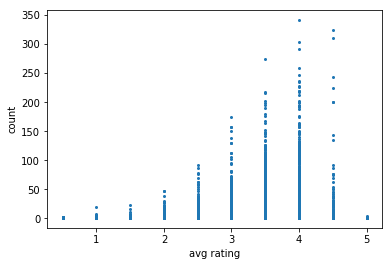

In [23]:
df_score.plot.scatter(y = 'count',x='rating',s=4)

plt.xlabel('avg rating')
plt.show()

In [25]:
df_score.sort_values(by=['count','rating'],ascending=False).head(5)

,title,count,rating
2933,Forrest Gump (1994),341,4.0
6391,Pulp Fiction (1994),324,4.5
7084,"Shawshank Redemption, The (1994)",311,4.5
7166,"Silence of the Lambs, The (1991)",304,4.0
7488,Star Wars: Episode IV - A New Hope (1977),291,4.0


In [26]:
genres = sorted(['Adventure','Animation','Children','Drama','Documentary','Horror','Musical','Thriller','Action',
              'Sci-Fi','War','Romance','Comedy','Crime','Fantasy','Western','Mystery','IMAX','Film-Noir'])

In [27]:
g = df.groupby('movieId')[['genres']].agg(sum)

In [30]:
temp = []

for i in genres:
    temp.append(g['genres'].apply(lambda x: i in x).sum()/len(g))
    
df_genre = pd.DataFrame(temp,index = genres).sort_values(by = 0,ascending=False)

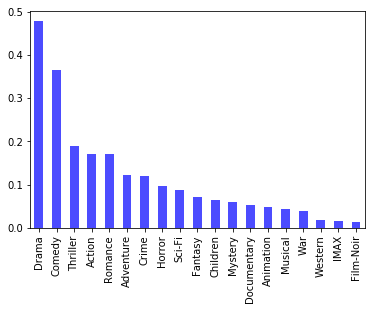

In [31]:
df_genre[0].plot(kind = 'bar',color = 'blue',alpha = 0.7)


plt.show()

### Distribution Users

In [32]:
count_user = df.groupby('userId')['rating'].count()
avg_user = df.groupby('userId')['rating'].mean()

In [33]:
df_users = pd.DataFrame({'rating':avg_user, 'count':count_user})
df_users['rating'] = df_users['rating'].apply(lambda x: rounded(x))

In [34]:
dist_avg_user = df_users.groupby('rating')['count'].count()

In [35]:
dist_avg_user /= dist_avg_user.sum()

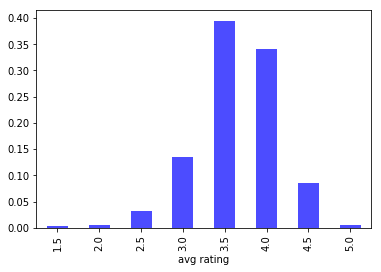

In [36]:
dist_avg_user.plot.bar(color = 'b',alpha= 0.7)

plt.xlabel('avg rating')
plt.show()

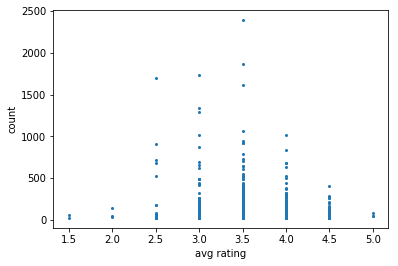

In [37]:
df_users.plot.scatter(x='rating',y='count',s = 4)

plt.xlabel('avg rating')
plt.show()

In [38]:
df_users.sort_values(by=['count','rating'],ascending=False).head(5)

,count,rating
userId,,
547,2391,3.5
564,1868,3.5
624,1735,3.0
15,1700,2.5
73,1610,3.5


### Time series Analysis

In [39]:
g = df.date.dt.to_period("Y")

In [45]:
year_rat = df.groupby(g)['rating'].count().cumsum()

In [46]:
year_rat /= year_rat.max()

In [50]:
year_title = df_mov.groupby('year')['title'].count().cumsum()

In [51]:
year_title /= year_title.max()

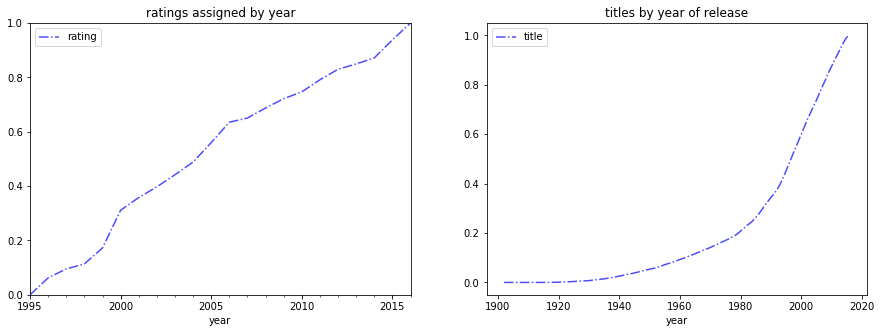

In [52]:
plt.subplots(1,2,figsize = (15,5))

plt.subplot(121)
year_count.plot(style = 'b-.',alpha = 0.7)
#plt.plot_date(month_count.index[5:], lm.intercept + year*lm.slope,fmt="-",c = 'r',alpha = 0.8,label = 'slope: {}'.format(round(lm.slope,2))) 
#plt.axvline('2000', c= 'g',linestyle='--',label = 'Year: {}'.format('2000'), alpha = 0.6)
plt.ylim((0,1))
plt.xlim(('1995-01','2016-08'))
plt.legend()
plt.title('ratings assigned by year')
plt.xlabel('year')

plt.subplot(122)
year_title.plot(style = 'b-.',alpha= 0.7)
#plt.plot(count_mov_y.index[-27:], lm2.intercept + year2*lm2.slope,c = 'r',alpha = 0.8,label = 'slope: {}'.format(round(lm2.slope,2)))
#plt.axvline(1990, c= 'g',linestyle='--',label = 'Year: {}'.format('1990'), alpha = 0.6)

plt.legend()
plt.title('titles by year of release')
plt.xlabel('year')
plt.show()

#### Fit

In [53]:
from scipy.stats import linregress

In [56]:
x = np.linspace(2000,2016,17,endpoint=True)

In [57]:
y = year_count.values[-17:]

In [58]:
lm = linregress(x,y)

In [59]:
x2 = np.linspace(1990,2016,27,endpoint=True)

In [60]:
y2 = year_title[-27:].values

In [61]:
lm2 = linregress(x2,y2)

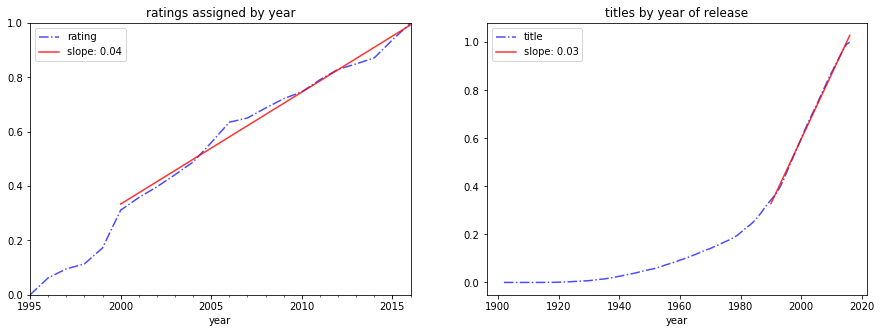

In [64]:
plt.subplots(1,2,figsize = (15,5))

plt.subplot(121)
year_count.plot(style = 'b-.',alpha = 0.7)
plt.plot_date(year_count.index[5:], lm.intercept + x*lm.slope,fmt="-",c = 'r',alpha = 0.8,label = 'slope: {}'.format(round(lm.slope,2))) 
plt.ylim((0,1))
plt.xlim(('1995-01','2016-08'))
plt.legend()
plt.title('ratings assigned by year')
plt.xlabel('year')

plt.subplot(122)
year_title.plot(style = 'b-.',alpha= 0.7)
plt.plot(year_title.index[-27:], lm2.intercept + x2*lm2.slope,c = 'r',alpha = 0.8,label = 'slope: {}'.format(round(lm2.slope,2)))

plt.legend()
plt.title('titles by year of release')
plt.xlabel('year')
plt.show()

In [66]:
year_user = pd.Series(df.groupby(g)['userId'])

In [68]:
temp = []

for i in range(22):
    temp.append(year_user[i][1].nunique())

year_user = pd.DataFrame(temp,index = year_count.index,columns = ['userId'])

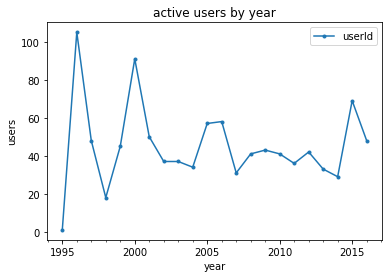

In [69]:
year_user.plot(style = '.-')

plt.title('active users by year')
plt.ylabel('users')
plt.xlabel('year')
plt.legend()
plt.show()